# Discrete Joint Semantic Alignment Hashing for Cross-Modal Image-Text Search（用于跨模态图文检索的离散的联合语义对齐散列）——论文翻译&阅读笔记


### 概要
有监督的跨模态图文散列在**理解数据搜索任务的视觉和语言之间的对应关系**方面引起了广泛关注。现有的方法通过利用给定的图像-文本数据对或要探索的监督信息，但这些方法仍然遇到了一些显然的缺陷：

  1. 多个语义信息（Semantic）之间没有接合，导致欠佳的搜索性能
  2. 这些方法大多采用了丢弃离散约束的方式，实现连续松弛的策略，这导致了大量（or大?）二进制验证的错误

解决上面的问题，作者提出了一种更新的有监督的散列方法，即**离散联合语义对齐散列（DJSAH）** 通俗讲是在语义间建立一个连接（又称类标签或成对相似性），因此有很高判别性的语义可被保存为散列代码的形式。

此外，一个离散的优化算法（with linear computation and memory cost//）被设计出来，以减少计算过程中哈希码的信息丢失，并且不会在过程中进行松弛策略。 在三个标准数据集上进行的试验和分析验证了DJSAH算法同其他前沿哈希方法相比的优越性

## 介绍
### 1.1 总体介绍
跨模态图文检索在跨越视觉和语言理解的媒体鸿沟起到重要作用，跨模态图文检索注重度量图像实例和文本实例之间的相关性。
由于最近互联网上的漫游多媒体数据爆炸式增长，基于散列的跨模态图文搜索方法，**将原始的高维特征矩阵**转换为紧凑的**二进制代码**，在多媒体信息处理和计算机视觉社区上一直是一个主流的研究课题。由于二进制码高效低内存消耗的优点，许多相关课题组已经取得了较好的进展。

因为图像文本间的媒体鸿沟，图文跨模态散列面临的的重要的问题是**如何在将原始数据实例二进制化为散列的同时保存跨模态语义的一致性**
当前的哈希方法主要分为两种：
  1. 第一种是无监督的，以从原始图像和文本数据模态中发现相关性；
  2. 第二种是有监督的学习，旨在通过获取共享的监督信息来挖掘对应关系（又称类标签或成对相似矩阵）
    
大体上，有监督的散列可以得到更加令人满意的结果（相比无监督的散列），所以有监督的散列是本文的主要关注方法。

### 1.2 有监督散列
许多有监督的哈希方法已经被研究出来，来提升跨模态图文检索的表现。这些有监督的方法主要是通过**构造高语义相似度或者公共标签信息来对搜索任务的统一哈希码进行学习**来进行设计。例如：有些代表性的著作  
Supervised Matrix Factorization Hashing (SMFH) **有监督的矩阵分解散列**  
Semantic Correlation Maximization (SCM) **语义相关最大化**  
Label Consistent Matrix Factorization Hashing (LCMFH)**标签一致的矩阵分解散列**   
Subspace Relation Learning for Cross-modal Hashing (SRLCH)**跨模态散列的子空间关联学习** etc.  
  
  
受益于深度学习技术的复兴，深度学习的相关研究被应用于跨模态图文检索，如有**监督的深度散列**，这些方法因为训练时间长，且不能解决散列模型的复杂目标函数，所以很难用于大规模跨模态图像文本数据检索的应用。

虽然现在有监督的哈希方法有不错的进展，仍然存在一些值得思考的问题：  
1. **有限的语义关系**：先前的大部分方法没有充分利用语义关系的情况下产生的检索结果不尽如人意，如LCMFH和SRLCH就**仅仅使用了类标签数据来生成哈希码**，而没有考虑模态内部成对的相似性；而SMFH，SCM和SePH通过**成对相似矩阵进行哈希编码的学习**，忽视了共性的标签信息且耗费了更多计算资源和存储空间。上述两种策略都没办法提供用于学习的这互补的语义信息，导致了 大量语义信息的丢失，从而无法得到更理想的检索表现。  
2. **二维优化问题**：在哈希优化方面，许多方法（如上述提到的五种）都采用了连续松弛法 **（通过丢弃离散约束来产生一个大概的哈希码的结果）** 但这不可避免的带来了大量的二进制验证错误以及随之而来的不够具有判断性的、不够理想的哈希码  
解决上述的两个问题，DJSAH的方法被提出（即**离散的联合语义对其散列**）。具体的讲，它结合了**共享类标签之间的语义一致性和转换后的成对相似性，并且也考虑了原始的图像文本数据的分布**，从而得到有区分度的统一哈希编码。因此，DJSAH充分利用到了多重语义关系，而不是进行有限的监督来提高检索的性能。

同时，作者提出来一个全新的优化算法，代替了传统迭代方法。新提出的优化算法，且新算法会直接生成离散的哈希码，因此减少了大二进制验证错误 

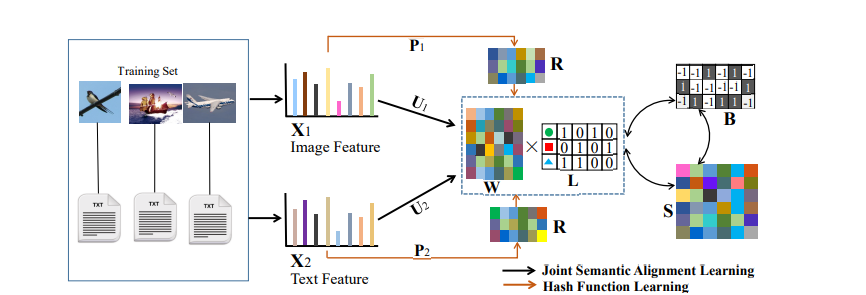
fig1：djsah框架
其中包括了联合语义对齐学习（学习过程为黑色箭头）以及哈希函数学习（橙色箭头）具体地，djsah通过合并原始的数据分布x1x2、标签L之间的语义对齐以及成对相似矩阵S来生成特定的哈希码B

### 1.3 本文主要贡献
1. 提出了全新的有监督跨模态图文哈希散列方法DJSAH，该方法**集成了低层级的数据特性以及高层及的多语义一致性（基于类标签以及成对相似性）来生成高效哈希码**。具体的讲，这种方法不仅通过充分利用语义关系升级了哈希码的判别能力，而且通过构造成对相似性规避了大量算力和存储的浪费
2. 构造了一个构造函数以及离散的优化函数，能够有效地获取到离散哈希码并且**不需要松弛**，更进一步的优化函数的细节理论分析在后文  
3. 大量实验分析表明DJSAH可以更好的运行  
**后续的编排：**
第二章讲述相关研究，第三部分介绍方法的细节（理论基础），第四部分展示相关的实验分析（即我需复现的部分），最后部分为总结


## 相关研究工作
**当前基于哈希方法的跨模态图文检索方法主要有两种。**
### 2.1 无监督哈希方法
无监督哈希方法通过发现**内部数据分布为基础的训练集之间的语义相关性**实现检索任务。相关的研究有Kumar*通过最小化跨模态检索的加权距离来获得相同样本的相似性*、Zhu采用了*锚图*（关于anchor：https://blog.csdn.net/weixin_44285715/article/details/105124650 ）来保持相同实例的关系而不是使用相似矩阵、Zhou通过*整合稀疏编码和矩阵分解产生独特的哈希码，将数据投影到二进制空间中*、Ding利用*基于跨模态散列的矩阵分解工具*来进行哈希码的学习、Wang采用了*集体矩阵分解散列*。总之，这些方法主要都使用了常见的数据特性来训练散列模型。和上述不同的，今年有一些信的方法结合了数据共性和独特的属性来提高检索准确率。Wang通过利用数据实例之间相似的特征表现，同时考虑到特有的特征表现，获取到了高质量的哈希码。其他相关的方法没被详述。 


其中方法**仅利用原始实例的内部数据分布和特征来获得哈希码**。 然而，数据对的单个特征表示**不能完全探索不同模式之间的相关性**。 因此，有必要在散列学习中利用共享的监督信息（标签或成对数据约束）。

### 2.2 有监督的哈希方法
通过**利用共享的、有监督的、数据实例之间的信息**，有监督的哈希方法能够更进一步的提高哈希码的质量。  
